In [161]:
%store -r normalized_df

In [190]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set()

In [163]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [164]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

X = normalized_df.drop(['kreftform'], axis=1)
y = normalized_df[['kreftform']]

In [248]:
multiple_graphs = pd.DataFrame()

for j in range(5):
    dropped_features = pd.DataFrame()
    randomized_df = X
    
    rnd_cols = list(X.columns)
    random.shuffle(rnd_cols)
    
    randomized_df = randomized_df[rnd_cols]

    list_of_accuracy = []
    print("Run #",j)
    print("_-_-_-_-_-_-_-_-")
    #for i in range(len(randomized_df.columns)):
    for i in range(len(randomized_df.columns)):
        if (len(randomized_df.columns) == 1):
            continue
        else:
            dropped_features = pd.concat([dropped_features, randomized_df.iloc[:, 0]], axis=1)
            randomized_df = randomized_df.drop(randomized_df.columns[0], axis=1)
            
            list_of_accuracy.append(run_more_than_once(10, randomized_df, y))
            if(len(randomized_df.columns) % 10) == 0:
                print(len(randomized_df.columns))
        
    multiple_graphs['accuracy_'+str(j)] = list_of_accuracy

Run # 0
_-_-_-_-_-_-_-_-
80
70
60
50
40
30
20
10
Run # 1
_-_-_-_-_-_-_-_-
80
70
60
50
40
30
20
10
Run # 2
_-_-_-_-_-_-_-_-
80
70
60
50
40
30
20
10
Run # 3
_-_-_-_-_-_-_-_-
80
70
60
50
40
30
20
10
Run # 4
_-_-_-_-_-_-_-_-
80
70
60
50
40
30
20
10


In [255]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, 'accuracy')

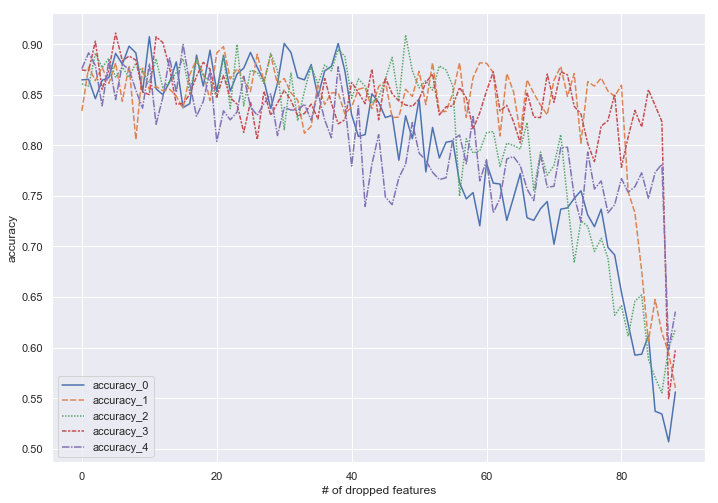

In [262]:
graph = sns.lineplot(data=multiple_graphs)
plt.xlabel('# of dropped features')
plt.ylabel('accuracy')

In [215]:
def run_once(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    lab_enc = preprocessing.LabelEncoder()
    encoded_y_train = lab_enc.fit_transform(y_train.values.ravel())
    encoded_y_test = lab_enc.fit_transform(y_test.values.ravel())
    
    clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train, encoded_y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    accuracy = accuracy_score(encoded_y_test, y_pred)
    print('Train accuracy: ', accuracy_score(encoded_y_train, y_pred_train))
    print(confusion_matrix(encoded_y_train, y_pred_train))
    print('----------------------------------')
    print('Test accuracy: ', accuracy_score(encoded_y_test, y_pred))
    print(confusion_matrix(encoded_y_test, y_pred))
    
def run_more_than_once(run_number, X, y):
    tot_acc = 0
    max_matrix = 0
    max_accuracy = 0

    min_matrix = 0
    min_accuracy = 1
    
    tot_acc_train = 0

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    lab_enc = preprocessing.LabelEncoder()
    encoded_y_train = lab_enc.fit_transform(y_train.values.ravel())
    encoded_y_test = lab_enc.fit_transform(y_test.values.ravel())
    
    for i in range(run_number):
        clf = RandomForestClassifier(n_estimators=100)

        clf.fit(X_train, encoded_y_train)
        y_pred = clf.predict(X_test)

        accuracy_train = accuracy_score(encoded_y_train, clf.predict(X_train))
        accuracy = accuracy_score(encoded_y_test, y_pred)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_matrix = confusion_matrix(encoded_y_test, y_pred)

        if accuracy < min_accuracy:
            min_accuracy = accuracy
            min_matrix = confusion_matrix(encoded_y_test, y_pred)

        tot_acc += accuracy
        tot = i+1
        mean = tot_acc/tot
        
        tot_acc_train += accuracy_train
        total = i+1
        mean_train = tot_acc_train/total

    #print('Maximum')
    #print(max_accuracy, '\n', max_matrix)
    #print('----------------------------------')
    #print('Minimum')
    #print(min_accuracy, '\n', min_matrix)
    #print('----------------------------------')
    #print('Mean train accuracy:', mean_train)
    #print('Mean test accuracy:', mean)
    return mean

In [37]:
work = run_more_than_once(10, randomized_df, y)

Maximum
0.8666666666666667 
 [[ 52  17   0]
 [  6 133   0]
 [  6   1  10]]
----------------------------------
Minimum
0.8533333333333334 
 [[ 52  17   0]
 [  9 130   0]
 [  6   1  10]]
----------------------------------
Mean train accuracy: 1.0
Mean test accuracy: 0.8591111111111112


In [14]:
run_once(randomized_df, y)

Train accuracy:  1.0
[[131   0   0]
 [  0 283   0]
 [  0   0  41]]
----------------------------------
Test accuracy:  0.8355555555555556
[[ 55  27   0]
 [  3 123   0]
 [  4   3  10]]
